In [1]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 8.7 MB/s eta 0:00:00


In [13]:
import pandas as pd
import torch
from torch.nn import Linear, Sequential, LeakyReLU, ReLU, SELU, GELU, Mish
from torch.utils.data import DataLoader
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.ensemble import RandomForestRegressor
from feature_engine.selection import DropCorrelatedFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [3]:
file_path = '/content/train_1.csv'

data = pd.read_csv(file_path)
data

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21189,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,50.148287,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21190,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21191,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [4]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]


X.head()

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0,
)

X_train.shape, X_test.shape

((16954, 80), (4239, 80))

## Remove correlated: Feature-engine

In [6]:

sel = SmartCorrelatedSelection(
    method="pearson",
    threshold=0.8,
    selection_method='model_performance',
    estimator=RandomForestRegressor(n_estimators=10, random_state=20),
    scoring='r2',
    cv=3,
)


sel.fit(X_train, y_train)




SmartCorrelatedSelection(estimator=RandomForestRegressor(n_estimators=10,
                                                         random_state=20),
                         scoring='r2', selection_method='model_performance')

In [7]:
sel.features_to_drop_

['mean_atomic_mass',
 'wtd_mean_atomic_mass',
 'wtd_gmean_atomic_mass',
 'entropy_atomic_mass',
 'wtd_entropy_atomic_mass',
 'range_atomic_mass',
 'wtd_range_atomic_mass',
 'wtd_std_atomic_mass',
 'mean_fie',
 'wtd_mean_fie',
 'wtd_gmean_fie',
 'entropy_fie',
 'range_fie',
 'std_fie',
 'mean_atomic_radius',
 'wtd_mean_atomic_radius',
 'wtd_gmean_atomic_radius',
 'wtd_entropy_atomic_radius',
 'range_atomic_radius',
 'std_atomic_radius',
 'wtd_std_atomic_radius',
 'wtd_mean_Density',
 'entropy_Density',
 'range_Density',
 'wtd_std_Density',
 'mean_ElectronAffinity',
 'wtd_gmean_ElectronAffinity',
 'entropy_ElectronAffinity',
 'wtd_entropy_ElectronAffinity',
 'range_ElectronAffinity',
 'wtd_std_ElectronAffinity',
 'mean_FusionHeat',
 'wtd_mean_FusionHeat',
 'wtd_gmean_FusionHeat',
 'entropy_FusionHeat',
 'wtd_entropy_FusionHeat',
 'range_FusionHeat',
 'wtd_std_FusionHeat',
 'wtd_mean_ThermalConductivity',
 'wtd_gmean_ThermalConductivity',
 'range_ThermalConductivity',
 'wtd_std_ThermalCon

In [8]:
sel.correlated_feature_sets_

[{'gmean_atomic_mass', 'mean_atomic_mass', 'wtd_mean_atomic_mass'},
 {'wtd_gmean_Density', 'wtd_gmean_atomic_mass', 'wtd_mean_Density'},
 {'entropy_Density',
  'entropy_ElectronAffinity',
  'entropy_FusionHeat',
  'entropy_Valence',
  'entropy_atomic_mass',
  'entropy_atomic_radius',
  'entropy_fie',
  'wtd_entropy_FusionHeat',
  'wtd_entropy_Valence',
  'wtd_entropy_atomic_mass',
  'wtd_entropy_atomic_radius'},
 {'range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass'},
 {'wtd_range_Density', 'wtd_range_atomic_mass'},
 {'gmean_fie', 'mean_fie'},
 {'wtd_gmean_atomic_radius',
  'wtd_gmean_fie',
  'wtd_mean_atomic_radius',
  'wtd_mean_fie',
  'wtd_std_fie'},
 {'wtd_entropy_ElectronAffinity', 'wtd_entropy_fie'},
 {'gmean_Density',
  'range_atomic_radius',
  'range_fie',
  'std_atomic_radius',
  'std_fie',
  'wtd_std_atomic_radius'},
 {'gmean_atomic_radius', 'mean_atomic_radius'},
 {'range_Density', 'std_Density', 'wtd_std_Density'},
 {'gmean_ElectronAffinity', 'mean_ElectronAffinity

In [9]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.shape, X_test_t.shape

((16954, 31), (4239, 31))

# Scaling

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_sc= min_max_scaler.fit_transform(X_train_t)

X_test_sc=min_max_scaler.fit_transform(X_test_t)

In [11]:
scaler = MinMaxScaler()


y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

# Modeling

In [14]:
# train-test split
dataloaders = {
    'train': DataLoader(
        list(zip(X_train_sc, y_train_sc)),
        batch_size=32
    ),
    'test': DataLoader(
        list(zip(X_test_sc, y_test_sc)),
        batch_size=32
    )
}

In [15]:
def train(model, dataloaders, lr, epochs):

    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler =torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=625)

    metrics = {'train' : {
        'mse_loss': [], 'mae_loss': [], 'mape_loss': [], 'r2_score': [], 'lr': [1]
        },
              'test' : {
                  'mse_loss': [], 'mae_loss': [], 'mape_loss': [], 'r2_score': [], 'lr': [1]
                  }
               }

    for epoch in range(epochs):
        for phase in ['train', 'test']:

            epoch_loss = 0.
            epoch_r2_score = 0.
            epoch_mae_loss = 0.
            epoch_mape_loss = 0.

            for x, y in dataloaders[phase]:

                y_pred = model(x.float())
                loss_value = criterion(y.float(), y_pred.squeeze(0))
                epoch_loss += loss_value.item()

                optimizer.zero_grad()

                if phase == 'train':
                    loss_value.backward()
                    optimizer.step()
                    scheduler.step(loss_value)

                y = y.detach().numpy()
                y_pred = y_pred.squeeze(0).detach().numpy()
                epoch_r2_score += r2_score(y, y_pred)
                epoch_mae_loss += mean_absolute_error(y, y_pred)
                epoch_mape_loss += mean_absolute_percentage_error(y, y_pred)

            metrics[phase]['mse_loss'].append(epoch_loss/len(dataloaders[phase]))
            metrics[phase]['r2_score'].append(epoch_r2_score/len(dataloaders[phase]))
            metrics[phase]['mae_loss'].append(epoch_mae_loss/len(dataloaders[phase]))
            metrics[phase]['mape_loss'].append(epoch_mape_loss/len(dataloaders[phase]))
            metrics[phase]['lr'].append(optimizer.param_groups[0]['lr'])

    return metrics


Проведём поиск наилучшей функции активации для данной архитектуры.

In [17]:
activ_funcs = [LeakyReLU, ReLU, SELU, GELU, Mish]
history = {}

for func in activ_funcs:

  model = Sequential(
              Linear(31, 256),
              func(),
              Linear(256, 512),
              func(),
              Linear(512, 256),
              func(),
              Linear(256, 64),
              func(),
              Linear(64, 1)
          )

  history[func.__name__] = train(model, dataloaders, 0.001, 25)

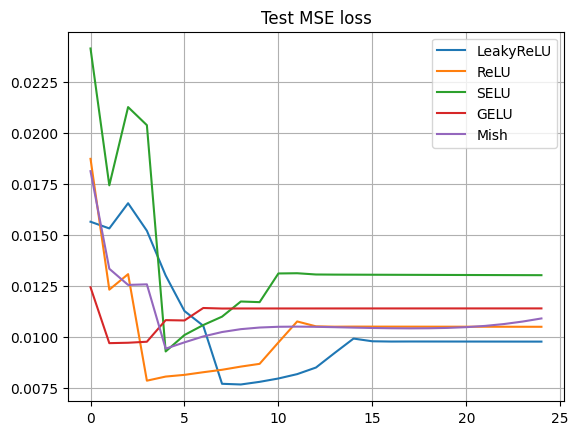

In [18]:
func_names = list(history.keys())

for func_name in func_names:
  plt.plot(range(25), history[func_name]['test']['mse_loss'])
plt.title('Test MSE loss')
plt.legend(func_names)
plt.grid(True)
plt.show()

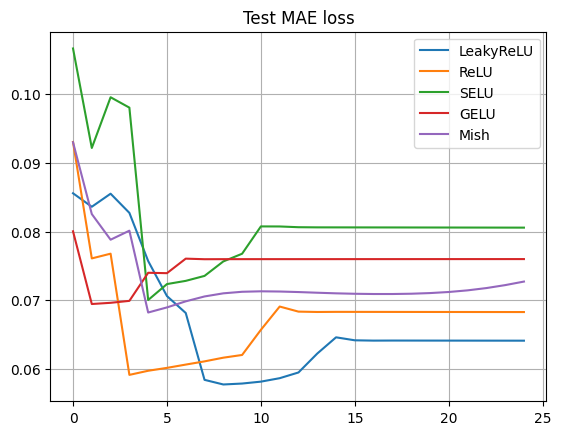

In [19]:
for func_name in func_names:
  plt.plot(range(25), history[func_name]['test']['mae_loss'])
plt.title('Test MAE loss')
plt.legend(func_names)
plt.grid(True)
plt.show()

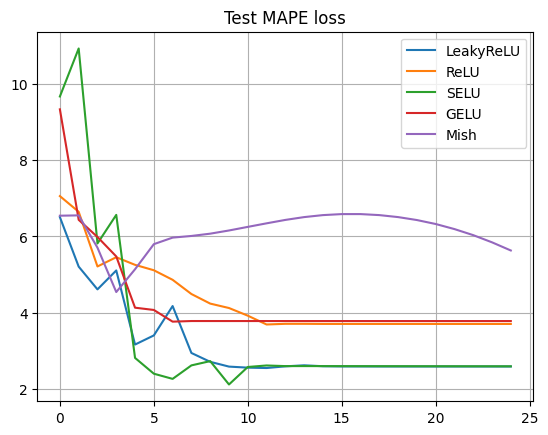

In [20]:
for func_name in func_names:
  plt.plot(range(25), history[func_name]['test']['mape_loss'])
plt.title('Test MAPE loss')
plt.legend(func_names)
plt.grid(True)
plt.show()

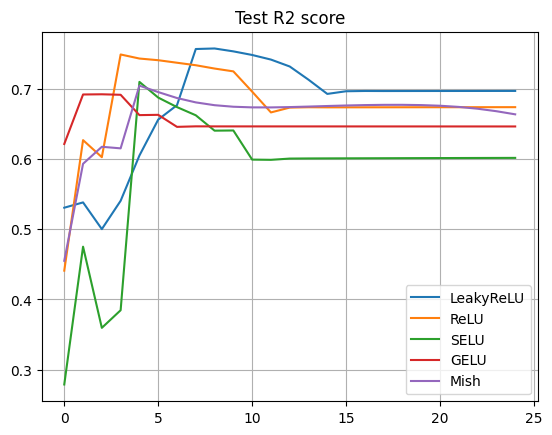

In [21]:
for func_name in func_names:
  plt.plot(range(25), history[func_name]['test']['r2_score'])
plt.title('Test R2 score')
plt.legend(func_names)
plt.grid(True)
plt.show()

Из графиков выше видно, что функция активации `LeakyReLU` дает наилучший результат на всех метриках.